In [1]:
# 乳腺癌诊断分类
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
# 加载数据集
data = pd.read_csv('./data.csv')

In [3]:
# 数据探索
# 因为数据集中列比较多、我们需要把 dataframe 中的列全部显示出来
pd.set_option('display.max_columns', None)
print(data.columns)
print(data.head(5))
print(data.describe())

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42

In [4]:
# 将特征字段分成 3 组
features_mean = list(data.columns[2:12])
features_se = list(data.columns[12:22])
features_worst = list(data.columns[22:32])

In [5]:
# 数据清洗
# ID 列没有用、删除该列
data.drop('id', axis=1, inplace=True)
# 将 B 良性替换为 0、N 恶性替换为 1
data['diagnosis'] = data['diagnosis'].map({'M':1, "B":0})

/Users/admin/Workspace/DataDev/venv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


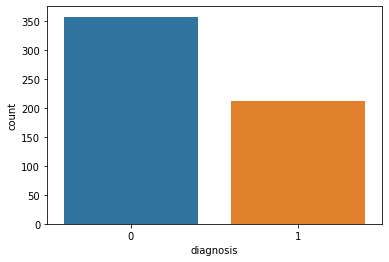

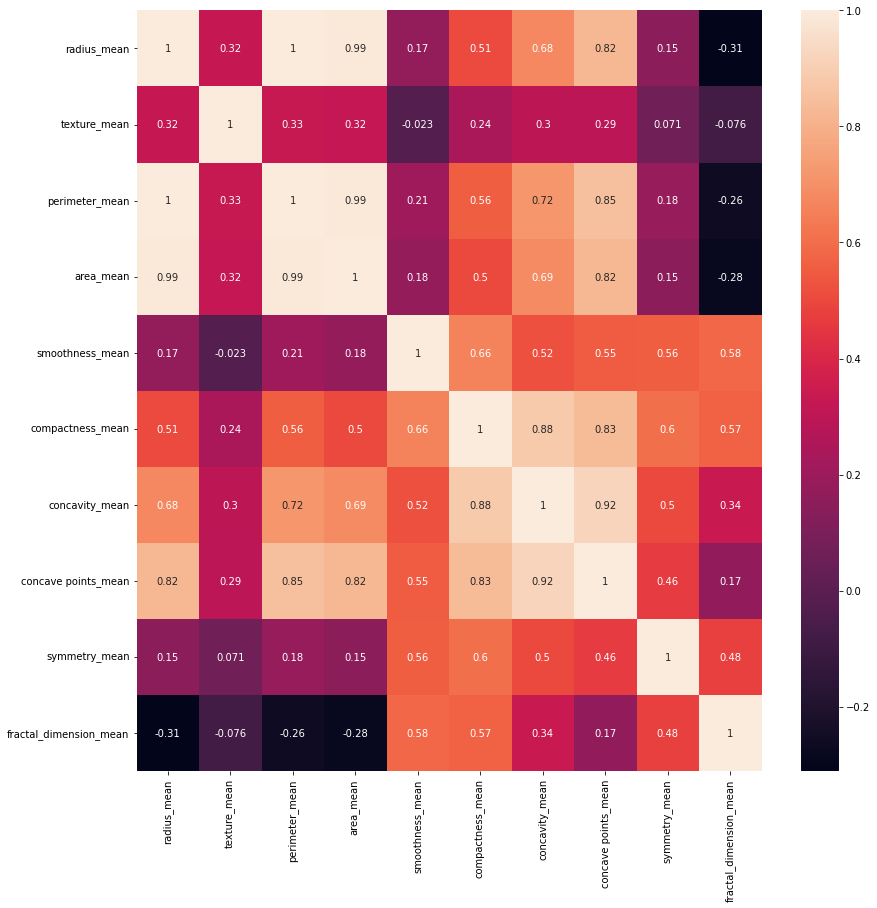

In [6]:
# 将肿瘤诊断结果可视化
sns.countplot(data['diagnosis'], label='Count')
plt.show()
# 用热力图呈现 feature_mean 字段之间的关联性
corr = data[features_mean].corr()
plt.figure(figsize=(14, 14))
# annot=True 显示每个方格的数据
sns.heatmap(corr, annot=True)
plt.show()

In [10]:
# 特征选择
features_remain = ['radius_mean','texture_mean', 'smoothness_mean','compactness_mean','symmetry_mean', 'fractal_dimension_mean'] 

# 抽取 30% 的数据作为测试集、其余作为训练集
train, test = train_test_split(data, test_size=0.3)
# 抽取特征选择的数值作为训练和测试数据
train_X = train[features_remain]
train_y = train['diagnosis']
test_X = test[features_remain]
test_y = test['diagnosis']

# 采用 Z-Score 规范化数据、保证每个特征维度的数据均值为 0、方差为 1
ss = StandardScaler()
train_X  = ss.fit_transform(train_X)
test_X = ss.transform(test_X)

In [12]:
# 创建 SVM 分类器
model = svm.SVC()
# 用训练集做训练
model.fit(train_X, train_y)
# 用测试集做预测
prediction = model.predict(test_X)
print('准确率：', metrics.accuracy_score(prediction, test_y))

准确率： 0.9064327485380117


In [13]:
# 创建 SVM 分类器
model = svm.LinearSVC()
# 用训练集做训练
model.fit(train_X, train_y)
# 用测试集做预测
prediction = model.predict(test_X)
print('准确率：', metrics.accuracy_score(prediction, test_y))

准确率： 0.8830409356725146
